In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import QuantileTransformer
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score
import sklearn
from sklearn.preprocessing import *
from sklearn.preprocessing import StandardScaler

def temp_sensible(dataframe):
    #체감온도 공식은 체감온도(℃)=13.12+0.6215×T-11.37V0.16+0.3965V0.16×T
    #출처:https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/
    temp_df_t=dataframe['temp_mean'].tolist()
    temp_df_w=dataframe['wind_mean'].tolist()
    temp_df_t
    temp_df_w
    result_=[]
    for i in range(len(temp_df_t)):
        result=13.12+0.6215*temp_df_t[i]-11.37*math.pow(temp_df_w[i],0.16)+0.3965*math.pow(temp_df_w[i],0.16)*temp_df_t[i]
        result_.append(round(result,1))
    dataframe.insert(4,'temp_sensible',result_)

def discomfort_index(dataframe):
    
    #0.81 * temp_df_t[i] +0.01 * temp_df_t[i]*((0.99*temp_df_t[i]) - 14.3)+ 46.3
    #불쾌지수 공식(80이상 : 매우 불쾌, 80~75: 50%불쾌 , 68~75 :불쾌감 시작, 68미만: 쾌적함)
    #discomfort_index
    temp_df_t=dataframe['temp_mean'].tolist()
    temp_df_h=dataframe['humidity'].tolist()
    temp_df_t
    temp_df_h

    result_=[]
    for i in range(len(temp_df_t)):
        result=(9/5*temp_df_t[i])-0.55*(1-temp_df_h[i]/100)*(9/5*temp_df_t[i]-26)+32
        result_.append(round(result,1))
    result_
    dataframe['discomfort_index']=result_


def pm_trafficlight(dataframe):
    pm10=dataframe['PM10'].tolist()
    pm2=dataframe['PM2.5'].tolist()
    pm_=[]
    for i in range(len(pm10)):
        if(pm10[i]<=30 or pm2[i]<=15):
            pm_.append(1)
        elif((pm10[i]<=80 and pm10[i]>30) or (pm2[i] >=16 and pm2[i]<=50)):
            pm_.append(2)
        elif((pm10[i]<=150 and pm10[i]>80)or (pm2[i]>50 and pm2[i]<=100)):
            pm_.append(3)
        elif(pm10[i]>=150 or (pm2[i]>100)):
            pm_.append(4)
    dataframe['pm']=pm_

def rental_rate(dataframe):
    y1 = dataframe[dataframe['year'] == 2018]['rental'] * 2.3
    y2 = dataframe[dataframe['year'] == 2019]['rental'] * 1.2
    y3 = dataframe[dataframe['year'] == 2020]['rental']
    new = pd.concat([y1, y2, y3], axis=0).to_frame()
    dataframe['rental'] = new['rental']
    return True




def seperate_datetime(dataframe):
    week_list = []
    year = []
    month = []
    for date in dataframe.date:
        year_point, month_point, day_point = date.split('-')
        year.append(int(year_point) - 2017)
        month.append(int(month_point))
    dataframe['year'] = year
    dataframe['month'] = month
    for day in dataframe['date']:
        num = pd.date_range(day, day, freq='D').to_series()
        week_list.append(int(num.dt.dayofweek[0]))
    dataframe['day'] = week_list
    dataframe = dataframe.drop(['date'], axis=1)
    return dataframe

def enter_week(dataframe):
    w_list = [1.02,1.02, 0.97, 0.95, 1.02, 1.01, 1.02]
    #corr 해서 상관관계에 따라 비율 설정 
    for i in range(0, 7):
        dataframe[dataframe['day'] == i] *= w_list[i]
        
clist = ['PM2.5*day_name_Sunday']


In [2]:
sample = pd.read_csv('sample_submission.csv')
sample
test_df = pd.read_csv('test.csv')
test_df
train = pd.read_csv('train.csv')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
test_date = test_df['date']



In [3]:
date=train['date'].tolist()
cnt=0
year=[]
month=[]
day=[]
year_=''
month_=''
day_=''
for _ in date:
    list_=_.split('-')
    for i in range(3):
        if(i==0):

            year_+=list_[i]
        
        elif(i==1):
            month_+=list_[i]
        elif(i==2):
            day_+=list_[i]
            
    year.append(int(year_))
    month.append(int(month_))
    day.append(int(day_))
    
    cnt+=1
    year_=''
    month_=''
    day_=''
train_=train.drop(columns='date')
train_['year']=year
train_['month']=month
train_['day']=day

train_['precipitation']=train_['precipitation'].fillna(0)
train_['PM10'] = train_['PM10'].fillna(train_['PM10'].mean())
train_['PM2.5'] = train_['PM2.5'].fillna(train_['PM2.5'].mean())
train_ = train_.fillna(train_.mean())
rental_rate(train_)
train_.isnull().sum()

precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     0
sunshine_rate    0
wind_mean        0
wind_max         0
rental           0
year             0
month            0
day              0
dtype: int64

In [8]:
# train_['month']

In [9]:
# train_.columns

In [10]:
# train_['july_hot'] = train_['temp_highest'].copy()
# train_['july_hot'] = train_['temp_highest'] * train_['sunshine_sum'] * train_['month']==7

# test_df['july_hot'] = test_df['temp_highest'].copy()
# test_df['july_hot'] = test_df['temp_highest'] * test_df['sunshine_sum'] * test_df['month']==7

In [11]:
# train_['PM10']

In [12]:
# # train_['rain'] = train_['temp_highest'].copy()
# # test_df['rain'] = test_df['temp_highest'].copy()


# for i in range(len(train_)):
#     if train_['precipitation'][i] >= 10:
# #         train_['rain'][i] = 1
#         train_['PM10'][i] = train_['PM10'][i] *0.1
# #         train_['PM2.5'][i] = train_['PM2.5'][i] * 0.1
# #     else:
# #         train_['rain'][i] = 0 
# #         test_df['rain'][i] = 0
        
# for i in range(len(test_df)):
#     if test_df['precipitation'][i] >=10:
# #         test_df['rain'][i] = 1
#         test_df['PM10'][i] = test_df['PM10'][i]*0.1
# #         test_df['PM2.5'][i] = test_df['PM2.5'][i]*0.1
# #     else:
# #         test_df['rain'][i] = 0
        

In [13]:
scaler1 = QuantileTransformer()
scaler2 = QuantileTransformer()
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum']
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5','wind_mean','wind_max']
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5']

# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5','wind_mean'
#               ,'wind_max','temp_mean','temp_highest','temp_lowest','humidity']

# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5','wind_mean'
#               ,'wind_max','humidity']
col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5', 'precipitation'
             ,'sunshine_rate','sunshine_sum']
# col___list = ['sunshine_rate','sunshine_sum', 'precipitation']

# col___list = bicycle.columns
scaler1.fit(train_[col___list])
X_train_scaled = scaler1.transform(train_[col___list])
train_[col___list] =X_train_scaled
scaler2.fit(test_df[col___list])
X_train_scaled = scaler2.transform(test_df[col___list])
test_df[col___list] =X_train_scaled


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (365). n_quantiles is set to n_samples.
  warnings.warn(


In [14]:
# train_['rain'] = train_['temp_highest'].copy()
# test_df['rain'] = test_df['temp_highest'].copy()


# for i in range(len(train_)):
#     if train_['precipitation'][i] >= 10:
#         train_['rain'][i] = 1
#         train_['PM10'][i] = train_['PM10'][i] *0.1
#         test_df['rain'][i] = 1
#         test_df['rain'][i] = test_df['rain'][i] * 0.1
#     else:
#         train_['rain'][i] = 0 
#         test_df['rain'][i] = 0
        
# print(np.mean(np.expm1(train_['rental'])))
    

In [15]:
#미세먼지 onehot
train_ = pd.get_dummies(data = train_,columns = ['pm'])
test_df = pd.get_dummies(data = test_df,columns = ['pm'])
test_df['pm_4']=0.0
test_df['pm_4']=test_df['pm_4'].astype('uint8')
train_['dust'] = train_['PM10'] * train_['PM2.5']
train_['temp_ratio'] = abs(train_['temp_highest'] - train_['temp_lowest'])
train_['daytime'] = train_['sunshine_rate'] / train_['sunshine_sum']
train_['daytime'] = train_['daytime'].fillna(method='bfill')
test_df['dust'] = test_df['PM10'] * test_df['PM2.5']
test_df['temp_ratio'] = abs(test_df['temp_highest'] - test_df['temp_lowest'])
test_df['daytime'] = test_df['sunshine_rate'] / test_df['sunshine_sum']
test_df['daytime'] = test_df['daytime'].fillna(method='bfill')


In [16]:
test_df=test_df.fillna(0)
train_=train_.drop(columns='sunshine_sum')
test_df=test_df.drop(columns='sunshine_sum')
#train_=train_.drop(columns='sunshine_rate')
#test_df=test_df.drop(columns='sunshine_rate')
#new_row = train_.loc[[613]]
#train_ = pd.concat([train_.iloc[:613], new_row, train_.iloc[613:]], ignore_index = True)


In [17]:
train = train.drop(index=788, axis = 0)


In [18]:
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRegressor as model

y = train_['rental']
x= train_.drop('rental',axis =1)
model = XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth = 4, n_estimators = 1000)



model.fit(x, y)
pred = model.predict(test_df)                                   
      


In [19]:
                     
pred = pd.DataFrame(pred, columns=['rental'])
# pred = np.expm1(pred)*1.35

pred = 

# pred = (pred)*1.35

In [20]:
# # sns.pairplot(data_df, hue = 'date_year', markers = ['o','s','d'])
# # plt.show()
# sns.pairplot(train)

In [21]:
result = pd.concat([test_date, pred],axis=1)
result = seperate_datetime(result)
enter_week(result)
# enter_month(result)
result = pd.concat([test_df, result['rental']],axis=1)
real_data = pd.read_csv('real_data.csv')
NMAE(real_data['rental'],pred['rental'])
#0.20994305332561805
#0.1759140807412157
#0.17160655151714022 result_2
#0.169358561366779
#0.16833088271950228 #1.03 예측값에 곱하면 더 오른다.
#0.1636956776772946 예측할때 곱하는거
#0.16183995947493923
# 0.16131674637594595
# 0.16131674637594595

0.21720022399742694

In [22]:
sample['rental'] = pred
sample

,date,rental
0,2021-01-01,33694.210938
1,2021-01-02,30953.312500
2,2021-01-03,25726.705078
3,2021-01-04,39651.042969
4,2021-01-05,33193.222656
...,...,...
360,2021-12-27,36225.605469
361,2021-12-28,39241.628906
362,2021-12-29,45443.742188
363,2021-12-30,38777.863281


In [23]:

sample.to_csv('0.16131674637594595.csv',index=False, encoding = 'UTF-8')
real_data

,date,rental
0,2021-01-01,22274
1,2021-01-02,23631
2,2021-01-03,21809
3,2021-01-04,32957
4,2021-01-05,29033
...,...,...
360,2021-12-27,42521
361,2021-12-28,51268
362,2021-12-29,52017
363,2021-12-30,48993


In [24]:
# p1=sum(train_[train_['year']==2018]['PM10'])
# p2=sum(train_[train_['year']==2019]['PM10'])
# p3=sum(train_[train_['year']==2020]['PM10'])

# print(p3/p1)
# print(p3/p2)

In [25]:
# fu=pred[(pred['rental']>=100000)&(pred['rental']<=140000)]['rental'].index.unique()
# fu

In [26]:
# tt=[]
# for _ in fu:
#     tt.append(train_.loc[_]['PM10'])
# tt

In [27]:
# real_data[(real_data['rental']>=100000)&(real_data['rental']<=140000)]['date'].unique()



In [28]:
p1=pred[['rental']]
p1['rental1']=real_data['rental']
p1

,rental,rental1
0,33694.210938,22274
1,30953.312500,23631
2,25726.705078,21809
3,39651.042969,32957
4,33193.222656,29033
...,...,...
360,36225.605469,42521
361,39241.628906,51268
362,45443.742188,52017
363,38777.863281,48993


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


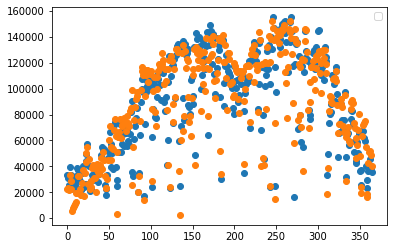

In [29]:
#vkfkd색이 예측값
# 주황색이 실제값
plt.scatter(p1.index,p1['rental'])
plt.scatter(p1.index,p1['rental1'])
plt.legend()
plt.show()

In [30]:
sum(pred['rental']*1.06)

33674665.8125

In [31]:
sum(real_data['rental'])

32054693

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


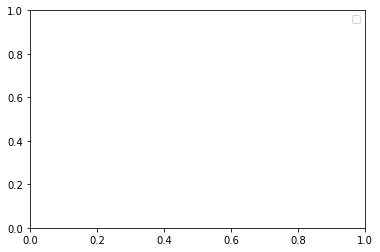

In [32]:
plt.legend()
plt.show()